In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\AI-Powered Supply Chain Demand Forecasting & Optimization\Data\Raw\crop_production.csv')

In [29]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [30]:
data.shape

(246091, 7)

In [31]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [33]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

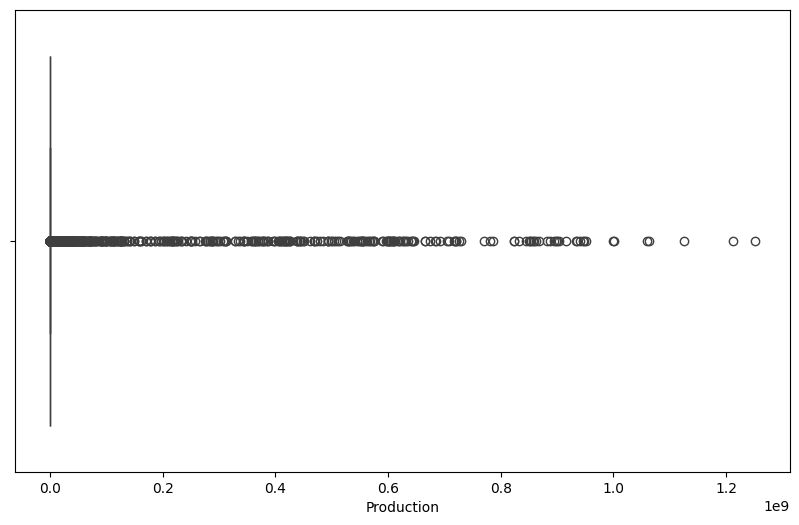

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Production'])
plt.show()

### Removing outliers using z-score and interquartile range

In [35]:
data = data[data['Production'] < data['Production'].quantile(0.99)]

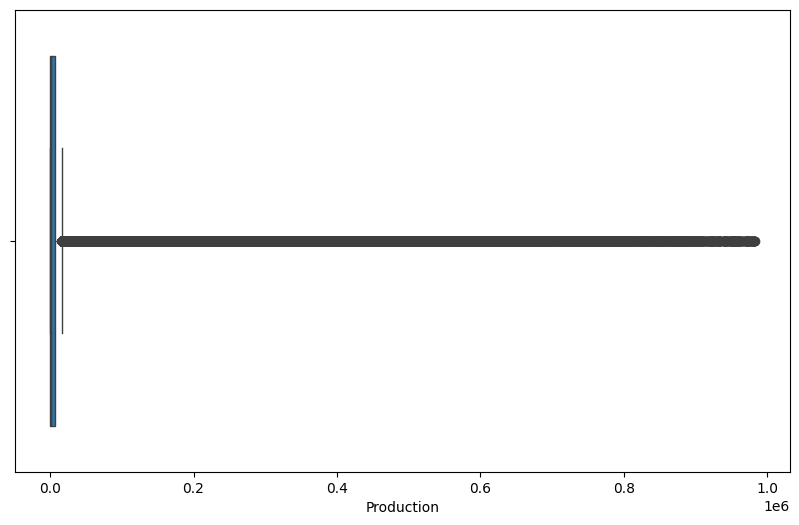

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Production'])
plt.show()

In [37]:
quartiles = data['Production'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1
upper_bond = q3 + 1.5 * iqr

data.drop(data[data['Production'] > upper_bond].index, inplace=True)

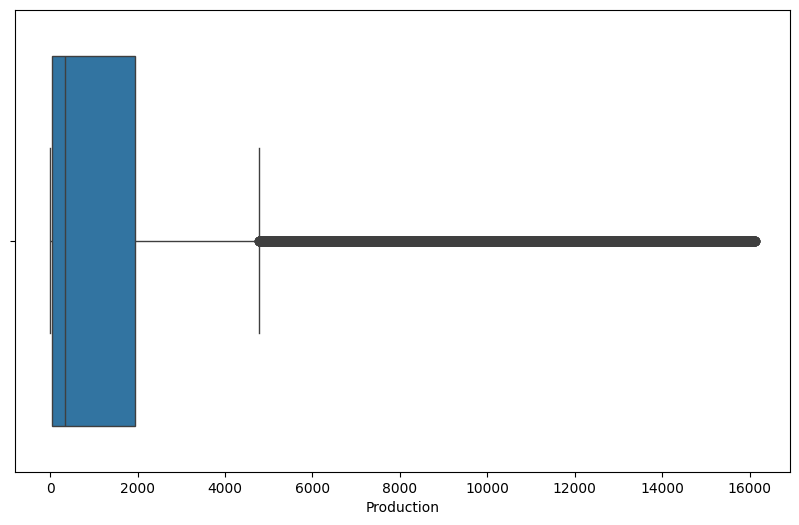

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Production'])
plt.show()

#### Using Z-score method.

In [39]:
mean = data['Production'].mean()
std_dev = data['Production'].std()

data = data[(data['Production'] > mean - 3 * std_dev) & (data['Production'] < mean + 3 * std_dev)]

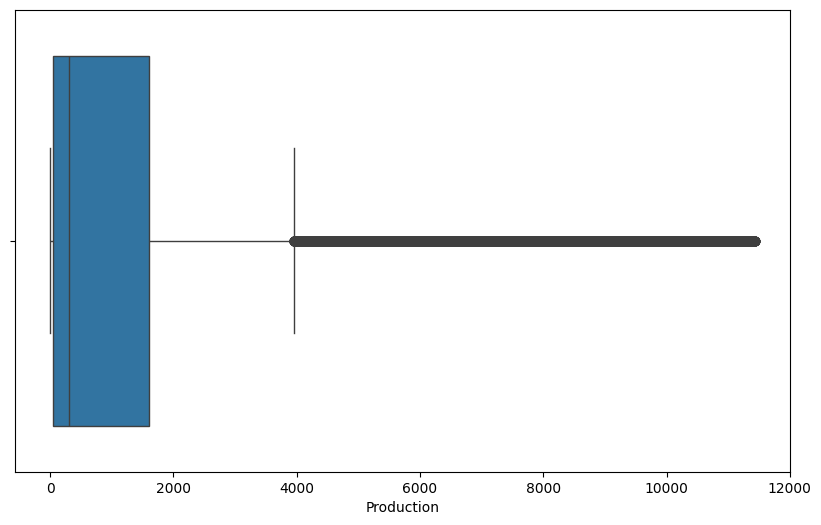

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Production'])
plt.show()

### Now after removing of outlier we can easily replace NaN values by production column!

In [41]:
data['Production'].mean()

np.float64(1424.1425409737883)

In [42]:
data['Production'].fillna(data['Production'].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8464\3454441377.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [43]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [44]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


### Outliers detection on "Area" column

In [45]:
data['Area'].mean()

np.float64(1781.7717984198985)

<Axes: xlabel='Area'>

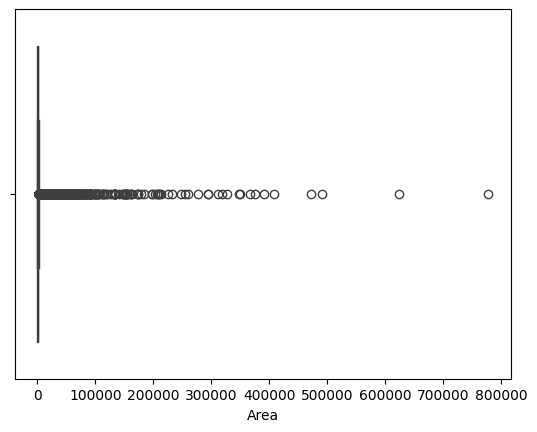

In [46]:
sns.boxplot(x=data['Area'])

In [47]:
## Interquartile Range Method
quartiles = data['Area'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1

upper_bond = q3 + 1.5 * iqr

data.drop(data[(data['Area'] > upper_bond)].index, inplace=True)

## Z-score Method
mean = data['Area'].mean()
std_dev = data['Area'].std()

data = data[(data['Area'] > mean - 3 * std_dev) & (data['Area'] < mean + 3 * std_dev)]


<Axes: xlabel='Area'>

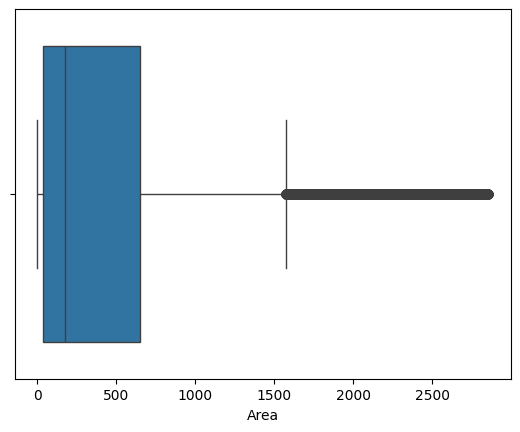

In [48]:
sns.boxplot(x=data['Area'])

In [49]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
